In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from seaborn import load_dataset
import missingno as msno
from wordcloud import WordCloud 

In [54]:
population=pd.read_csv('C:/Users/Windows10/Desktop/Project/world-population.csv')
population

,country,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,Rank
0,Afghanistan,2020,38928346,2.33 %,886592,-62920.0,18.4,4.56,60,25.4 %,9904337,0.50 %,7794798739,37
1,Afghanistan,2019,38041754,2.34 %,869833,-62920.0,17.4,5.26,58,25.2 %,9582625,0.49 %,7713468100,37
2,Afghanistan,2018,37171921,2.41 %,875808,-62920.0,17.4,5.26,57,24.9 %,9273302,0.49 %,7631091040,38
3,Afghanistan,2017,36296113,2.58 %,913081,-62920.0,17.4,5.26,56,24.7 %,8971472,0.48 %,7547858925,39
4,Afghanistan,2016,35383032,2.82 %,969429,-62920.0,17.4,5.26,54,24.5 %,8670939,0.47 %,7464022049,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4191,Zimbabwe,1975,6293875,3.54 %,200914,-9109.0,15.4,7.40,16,19.3 %,1215331,0.15 %,4079480606,79
4192,Zimbabwe,1970,5289303,3.42 %,163625,-8400.0,15.6,7.40,14,17.0 %,898584,0.14 %,3700437046,79
4193,Zimbabwe,1965,4471177,3.43 %,138899,-3002.0,16.0,7.30,12,14.4 %,644767,0.13 %,3339583597,91
4194,Zimbabwe,1960,3776681,3.28 %,112679,-1501.0,17.2,7.00,10,12.5 %,472478,0.12 %,3034949748,87


In [55]:
population.shape

(4196, 14)

In [56]:
population.columns

Index(['country', 'Year', 'Population', 'Yearly %   Change', 'Yearly  Change',
       'Migrants (net)', 'Median Age', 'Fertility Rate', 'Density (P/Km²)',
       'Urban  Pop %', 'Urban Population', 'Country's Share of  World Pop',
       'World Population', 'Rank'],
      dtype='object')

In [57]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4196 entries, 0 to 4195
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        4196 non-null   object 
 1   Year                           4196 non-null   int64  
 2   Population                     4196 non-null   int64  
 3   Yearly %   Change              4196 non-null   object 
 4   Yearly  Change                 4196 non-null   int64  
 5   Migrants (net)                 3618 non-null   float64
 6   Median Age                     3618 non-null   float64
 7   Fertility Rate                 3618 non-null   float64
 8   Density (P/Km²)                4196 non-null   int64  
 9   Urban  Pop %                   4196 non-null   object 
 10  Urban Population               4196 non-null   object 
 11  Country's Share of  World Pop  4196 non-null   object 
 12  World Population               4196 non-null   i

In [58]:
population.isnull().sum()

country                            0
Year                               0
Population                         0
Yearly %   Change                  0
Yearly  Change                     0
Migrants (net)                   578
Median Age                       578
Fertility Rate                   578
Density (P/Km²)                    0
Urban  Pop %                       0
Urban Population                   0
Country's Share of  World Pop      0
World Population                   0
Rank                               0
dtype: int64

## Migrants (net),Median Age,Fertility Rate and Density (P/Km²) columns have some missing datas

In [59]:
population.loc[:,['Migrants (net)','Median Age','Fertility Rate']]

,Migrants (net),Median Age,Fertility Rate
0,-62920.0,18.4,4.56
1,-62920.0,17.4,5.26
2,-62920.0,17.4,5.26
3,-62920.0,17.4,5.26
4,-62920.0,17.4,5.26
...,...,...,...
4191,-9109.0,15.4,7.40
4192,-8400.0,15.6,7.40
4193,-3002.0,16.0,7.30
4194,-1501.0,17.2,7.00


In [60]:
population.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,4196.0,1.993957e+03,2.168615e+01,1.955000e+03,1.975000e+03,1.995000e+03,2.016000e+03,2.020000e+03
Population,4196.0,2.442938e+07,1.067293e+08,6.440000e+02,2.855070e+05,3.685932e+06,1.305111e+07,1.439324e+09
Yearly Change,4196.0,3.297777e+05,1.334212e+06,-6.730240e+05,1.324250e+03,3.892450e+04,2.075432e+05,2.067648e+07
Migrants (net),3618.0,-4.818684e+00,1.060564e+05,-1.077397e+06,-1.228375e+04,-9.000000e+02,5.000000e+03,1.771991e+06
Median Age,3618.0,2.547499e+01,8.218262e+00,1.440000e+01,1.850000e+01,2.275000e+01,3.160000e+01,4.840000e+01
Fertility Rate,3618.0,3.887186e+00,1.985077e+00,8.500000e-01,2.090000e+00,3.400000e+00,5.740000e+00,8.800000e+00
Density (P/Km²),4196.0,3.435010e+02,1.751260e+03,0.000000e+00,2.100000e+01,7.100000e+01,1.710000e+02,2.615000e+04
World Population,4196.0,5.677487e+09,1.732760e+09,2.773020e+09,4.079481e+09,5.744213e+09,7.464022e+09,7.794799e+09
Rank,4196.0,1.171857e+02,6.750623e+01,1.000000e+00,5.900000e+01,1.170000e+02,1.750000e+02,2.350000e+02


In [61]:
population.rename(columns={'Migrants (net)':'Migrants_(net)','Median Age':'Median_Age','Yearly %':'Yearly_%',
                           'Yearly  Change':'Yearly_Change','Fertility Rate':'Fertility_Rate','Density (P/Km²)':'Density_(P/Km²)',
                          'Urban  Pop %':'Urban_Pop_%','Urban Population':'Urban_Population','Countrys Share of  World Pop':'Countrys_Share_of_World_Pop','World Population':'World_Population'},inplace=True)

In [62]:
population.columns

Index(['country', 'Year', 'Population', 'Yearly %   Change', 'Yearly_Change',
       'Migrants_(net)', 'Median_Age', 'Fertility_Rate', 'Density_(P/Km²)',
       'Urban_Pop_%', 'Urban_Population', 'Country's Share of  World Pop',
       'World_Population', 'Rank'],
      dtype='object')

In [63]:
population['Migrants_(net)'].value_counts()

 0.0        152
-4000.0      38
-10000.0     37
-2000.0      25
-30000.0     25
           ... 
-3181.0       1
-5337.0       1
-3714.0       1
-2971.0       1
-901.0        1
Name: Migrants_(net), Length: 2258, dtype: int64

In [64]:
population['Median_Age'].value_counts()

17.6    48
18.9    48
18.5    47
17.8    44
17.1    44
        ..
40.4     1
44.8     1
44.6     1
45.6     1
14.4     1
Name: Median_Age, Length: 311, dtype: int64

In [65]:
population['Fertility_Rate'].value_counts()

1.72    25
2.00    24
6.60    23
1.53    23
1.98    22
        ..
5.73     1
5.28     1
6.84     1
1.12     1
5.64     1
Name: Fertility_Rate, Length: 643, dtype: int64

<Axes: >

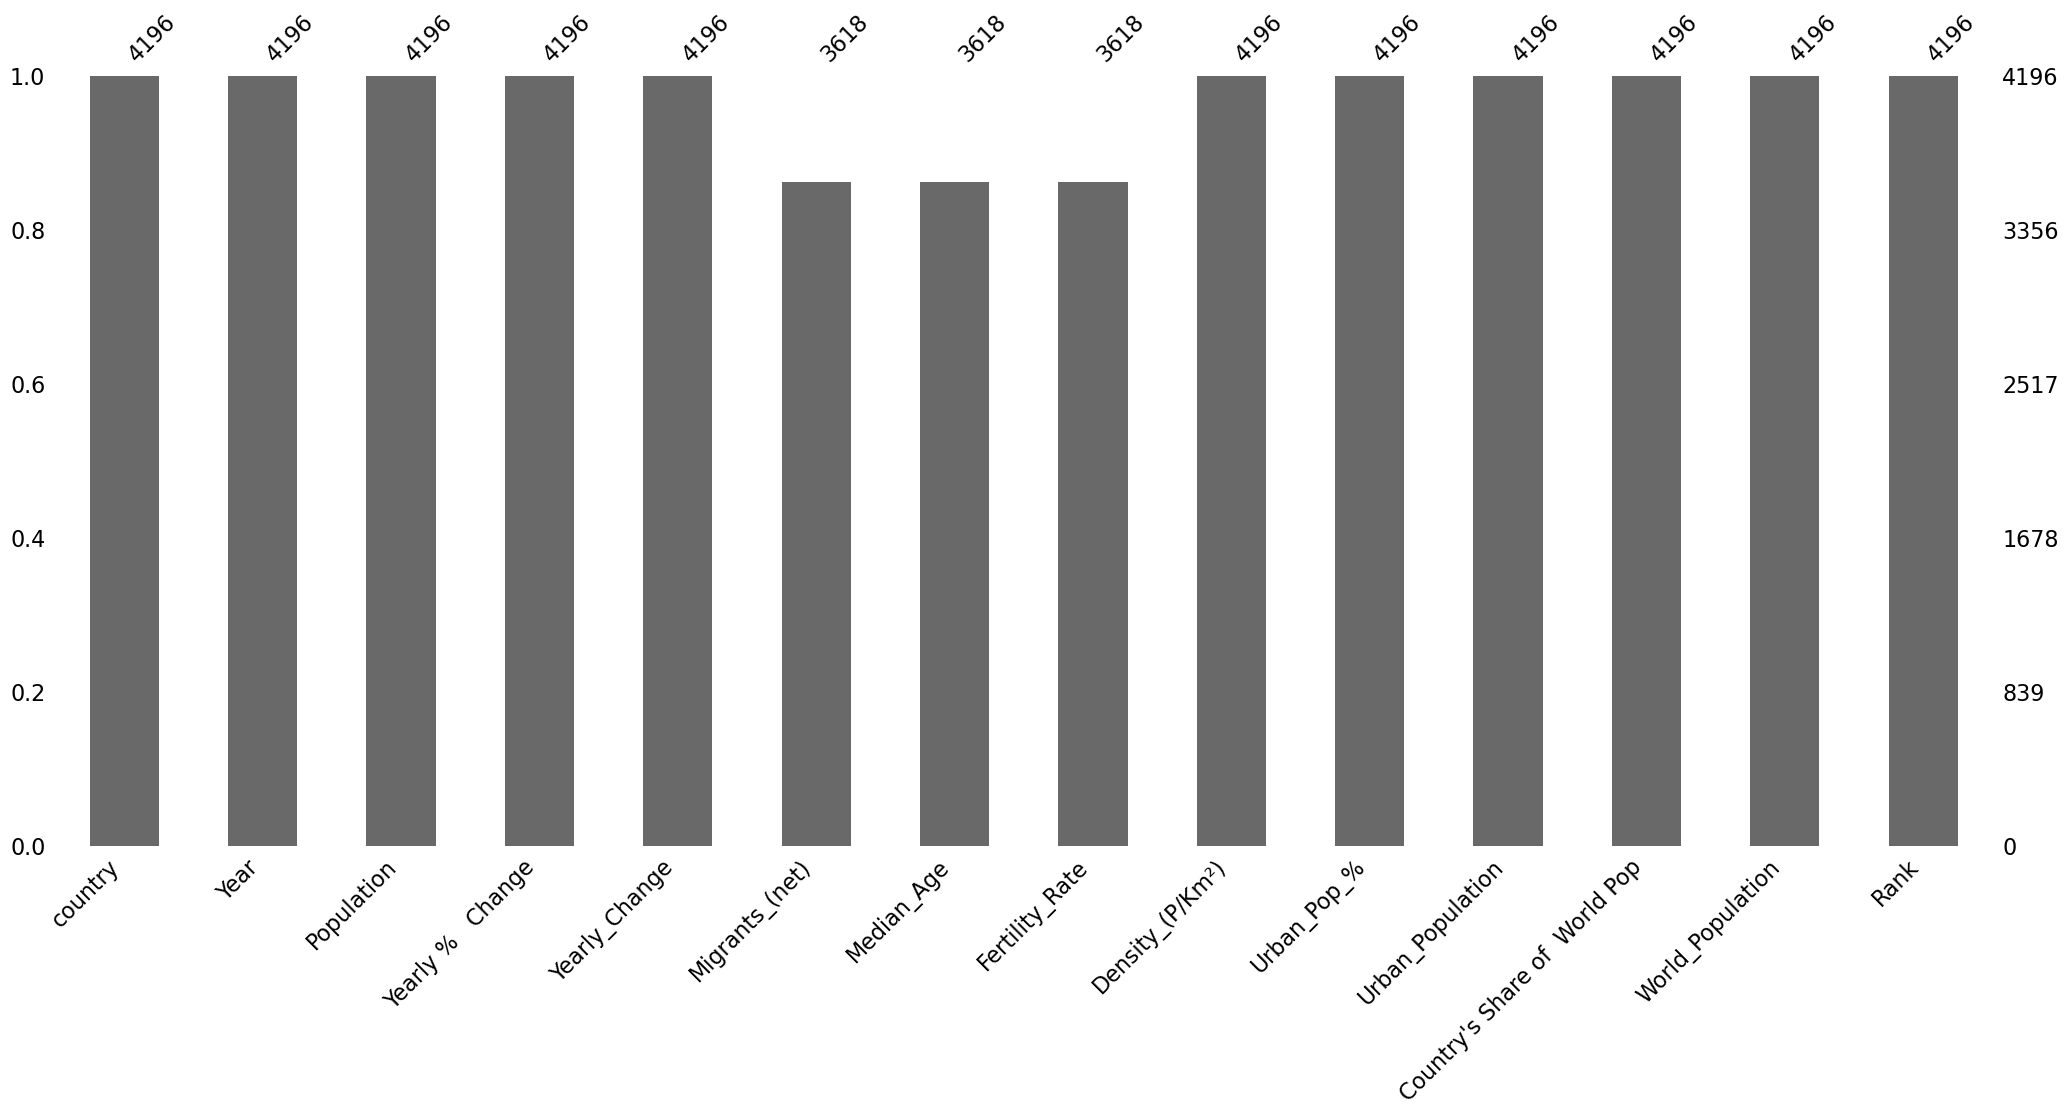

In [66]:
msno.bar(population)

In [67]:
population['Migrants_(net)'].fillna('0',inplace=True)

In [68]:
population['Median_Age'].fillna('0',inplace=True)
population['Fertility_Rate'].fillna('0',inplace=True)

<Axes: >

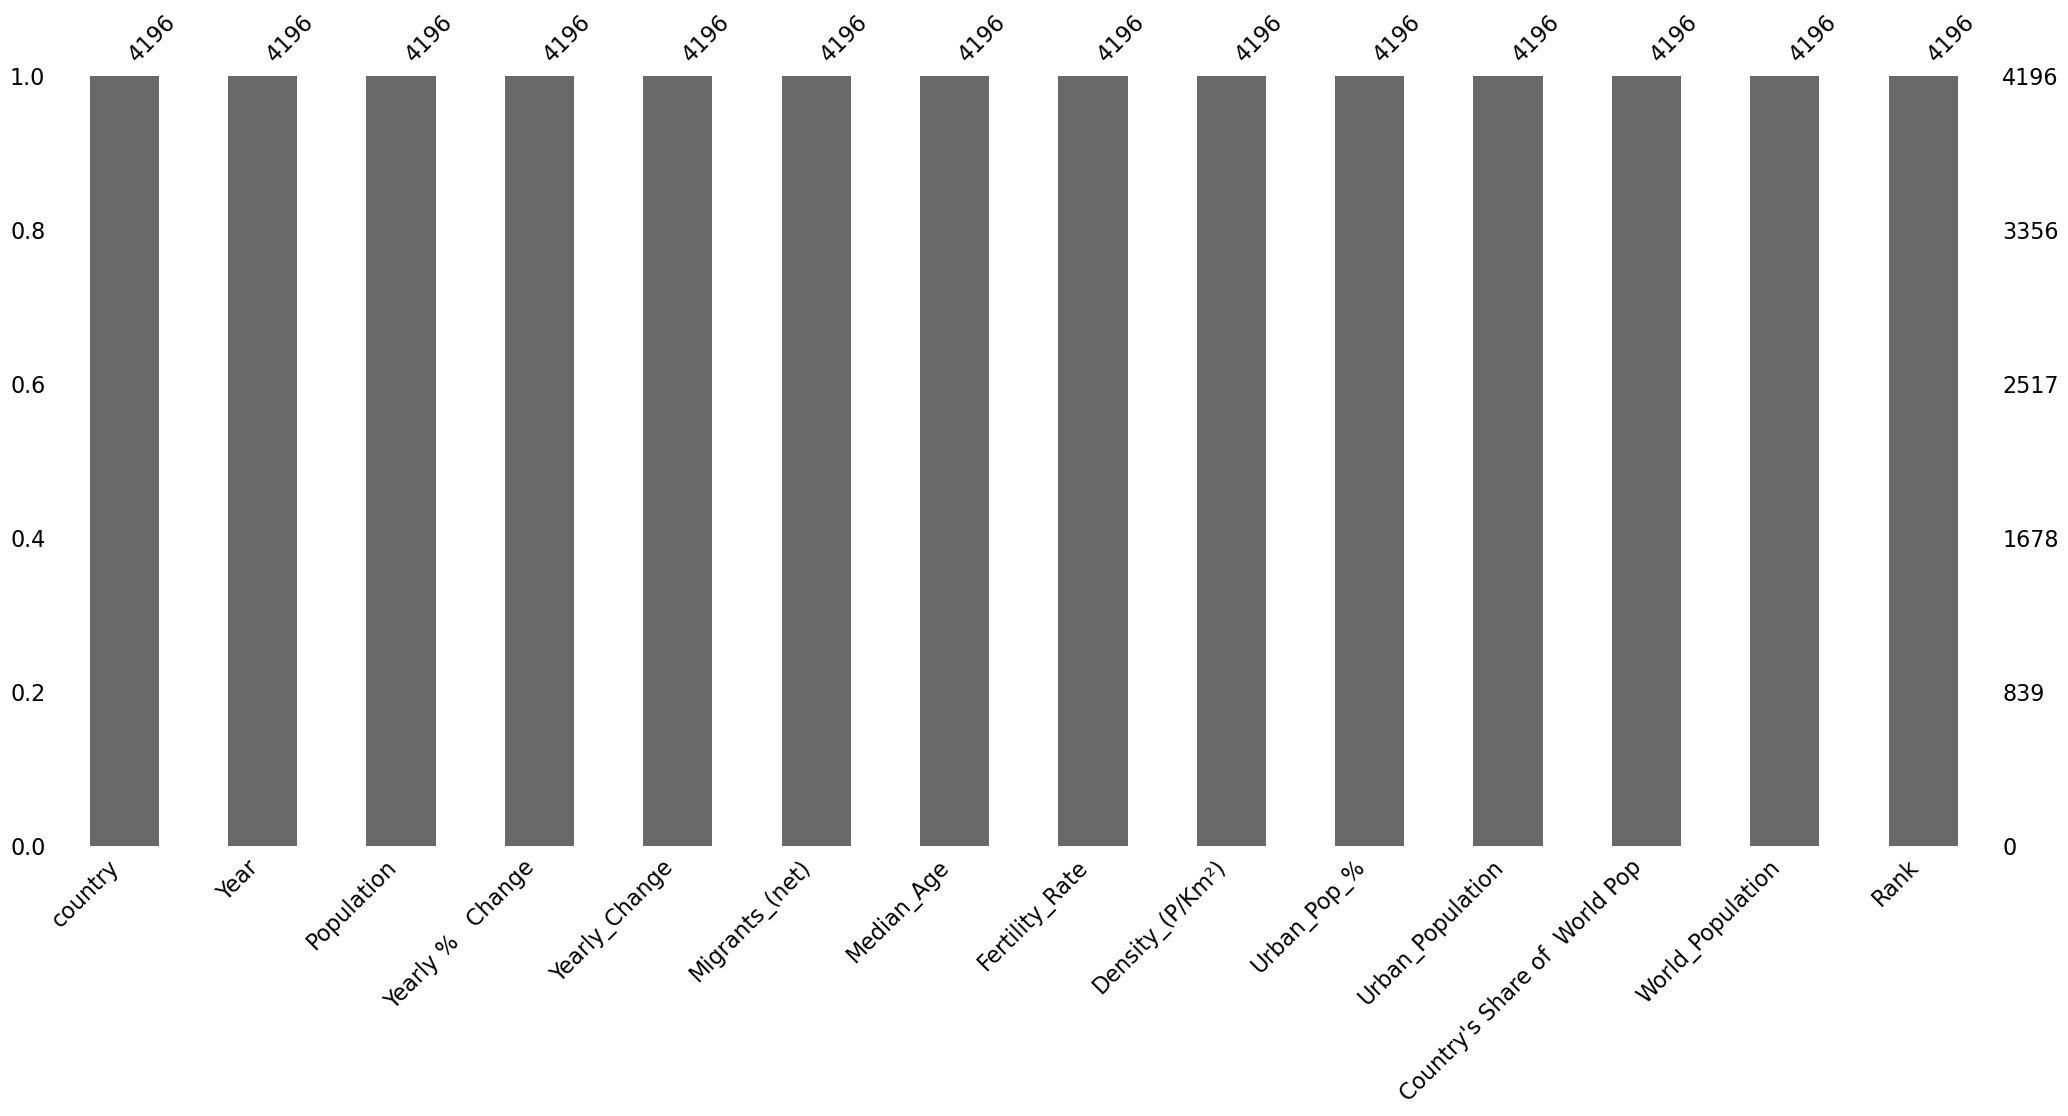

In [69]:
msno.bar(population)

## Now missing data from Migrants (net),Median Age,Fertility Rate and Density (P/Km²) columns are removed.

In [70]:
population['Median_Age'].isnull().sum()

0

In [71]:
population['Fertility_Rate'].isnull().sum()

0

In [72]:
population['Migrants_(net)'].isnull().sum()

0

In [73]:
population['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua And Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia And Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Caribbean Netherlands', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', 'Cote D Ivoire', 'Croatia', 'Cuba', 'Curaçao',
       'Cyprus', 'Czech Republic', 'Democratic Republic Of The Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia

In [74]:
population['country'].value_counts()

Afghanistan       18
Norway            18
Myanmar           18
Namibia           18
Nepal             18
                  ..
San Marino        17
Cook Islands      17
Sint Maarten      17
Cayman Islands    17
Liechtenstein     17
Name: country, Length: 235, dtype: int64

In [75]:
population.columns

Index(['country', 'Year', 'Population', 'Yearly %   Change', 'Yearly_Change',
       'Migrants_(net)', 'Median_Age', 'Fertility_Rate', 'Density_(P/Km²)',
       'Urban_Pop_%', 'Urban_Population', 'Country's Share of  World Pop',
       'World_Population', 'Rank'],
      dtype='object')

In [81]:
population.sort_values('Population',ascending=True)

,country,Year,Population,Yearly % Change,Yearly_Change,Migrants_(net),Median_Age,Fertility_Rate,Density_(P/Km²),Urban_Pop_%,Urban_Population,Country's Share of World Pop,World_Population,Rank,above one lakh
1620,Holy See,1970,644,-5.49 %,-42,0,0,0,1610,N.A.,N.A.,0 %,3700437046,235,3472
1618,Holy See,1980,724,-0.11 %,-1,0,0,0,1810,N.A.,N.A.,0 %,4458003514,235,3472
1619,Holy See,1975,728,2.48 %,17,0,0,0,1820,N.A.,N.A.,0 %,4079480606,235,3472
1617,Holy See,1985,746,0.6 %,4,0,0,0,1865,N.A.,N.A.,0 %,4870921740,235,3472
1616,Holy See,1990,768,0.58 %,4,0,0,0,1920,N.A.,N.A.,0 %,5327231061,235,3472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,China,2016,1414049351,0.51 %,7201481,-348399.0,37.0,1.65,151,56.3 %,796289491,18.94 %,7464022049,1,3472
770,China,2017,1421021791,0.49 %,6972440,-348399.0,37.0,1.65,151,57.5 %,816957613,18.83 %,7547858925,1,3472
769,China,2018,1427647786,0.47 %,6625995,-348399.0,37.0,1.65,152,58.6 %,837022095,18.71 %,7631091040,1,3472
768,China,2019,1433783686,0.43 %,6135900,-348399.0,37.0,1.65,153,59.7 %,856409297,18.59 %,7713468100,1,3472


In [85]:
population['above one lakh']=(population['Population']>=100000).sum()
population['above one lakh'].unique()   

array([3472], dtype=int64)

In [88]:
population['above one lakh'].shape

(4196,)